# Import Agribalyse and link to ecoinvent 3.2 cutoff

[Agribalyse](http://www.ademe.fr/en/expertise/alternative-approaches-to-production/agribalyse-program) is a French LCI database of agricultural products. It builds on top of ecoinvent 3.2. It was exported from SimaPro, so the names of ecoinvent processes are mangled, and need to be fixed back to standard ecoinvent.

This notebook uses Agribalyse 1.3.

In [1]:
from brightway2 import *

Create a new project for this notebook

In [2]:
projects.set_current("Agribalyse 1.3")

## Add biosphere flows

Biosphere flow names follow the standard in ecoinvent 3.3. We will need to match these names to those in Agribalyse.

In [ ]:
bw2setup()

Biosphere database already present!!! No setup is needed


## Import ecoinvent 3.2 cutoff as background database

In [ ]:
path = "/Users/cmutel/Documents/LCA Documents/Ecoinvent/3.2/cutoff/datasets"
importer = SingleOutputEcospold2Importer(path, "ecoinvent 3.2 cutoff")
importer.apply_strategies()
importer.statistics()

Extracting XML data from 12916 datasets


In [ ]:
importer.write_database()

## Load Agribalyse data

This notebook uses the SimaPro CSV version of Agribalyse.

In [3]:
path = "/Users/cmutel/Documents/LCA Documents/Agribalyse/1.3/Agribalyse CSV FINAL_no links_Nov2016v3.CSV"
ag = SimaProCSVImporter(path, "Agribalyse 1.3")
ag.apply_strategies()
ag.statistics()

Extracted 1189 unallocated datasets in 5.21 seconds
Applying strategy: normalize_units
Applying strategy: assign_only_product_as_production
Applying strategy: drop_unspecified_subcategories
Applying strategy: sp_allocate_products
Applying strategy: fix_zero_allocation_products
Applying strategy: split_simapro_name_geo
Applying strategy: strip_biosphere_exc_locations
Applying strategy: migrate_datasets
Applying strategy: migrate_exchanges
Applying strategy: set_code_by_activity_hash
Applying strategy: link_technosphere_based_on_name_unit_location
Applying strategy: change_electricity_unit_mj_to_kwh
Applying strategy: normalize_biosphere_categories
Applying strategy: normalize_simapro_biosphere_categories
Applying strategy: normalize_biosphere_names
Applying strategy: normalize_simapro_biosphere_names
Applying strategy: migrate_exchanges
Applying strategy: fix_localized_water_flows
Applying strategy: link_iterable_by_fields
Applied 19 strategies in 4.46 seconds
1261 datasets
115259 excha

(1261, 115259, 9003)

## Link to `ecoinvent 3.2`

We start by changing the SimaPro names to what ecoinvent provides, as we are using the ecoinvent-provided version of 3.2. We can then match the unlinked inputs in `Agribalyse` against the outputs provided by `ecoinvent`.

In [4]:
ag.migrate('simapro-ecoinvent-3.2')

Applying strategy: migrate_datasets
Applying strategy: migrate_exchanges


In [5]:
ag.match_database("ecoinvent 3.2 cutoff", fields=('reference product', 'location', 'unit', 'name'))

Applying strategy: link_iterable_by_fields


In [6]:
ag.statistics()

1261 datasets
115259 exchanges
2904 unlinked exchanges
  Type biosphere: 460 unique unlinked exchanges
  Type technosphere: 33 unique unlinked exchanges


(1261, 115259, 2904)

Let's look at what we can't link. The easiest way is to export the unlinked exchanges to an Excel file.

In [7]:
ag.write_excel(True)

Wrote matching file to:
/Users/cmutel/Library/Application Support/Brightway3/Agribalyse-13.a68c51d5c40982bcd21e1aa4ec805302/output/db-matching-Agribalyse-13-unlinked.xlsx


You can also [download this Excel file](https://docs.brightwaylca.org/images/db-matching-Agribalyse-13-unlinked.xlsx).

## Add unlinked biosphere flows

Brightway2-IO 0.5.7 includes a lot of fixes to import Agribalyse more cleanly: [2a5406a](https://bitbucket.org/cmutel/brightway2-io/commits/2a5406ab9e12f72745a2efc90b7b4c696ade8717), [0154841](https://bitbucket.org/cmutel/brightway2-io/commits/01548417d69438c010e60431a0ca0cf44408a034), [b2d5545](https://bitbucket.org/cmutel/brightway2-io/commits/b2d55453b98f377cb8b1356c5326e9480fac24fa), [99b07b9](https://bitbucket.org/cmutel/brightway2-io/commits/99b07b9daaf8899c636c9aa51466bf833c51f106), [2129804](https://bitbucket.org/cmutel/brightway2-io/commits/2129804044f0503cf67a70d0841e0e1582530b99), [5d6b936](https://bitbucket.org/cmutel/brightway2-io/commits/5d6b9361f32c58cfaed19a6f3352d129eca1f806), and [5d0542a](https://bitbucket.org/cmutel/brightway2-io/commits/5d0542aee7f7ebe3aa418cbd0fac9ac696c0eb26).

However, there are still a large number of biosphere flows not used in ecoinvent that we don't have in our `biosphere3` database (and, consequently, in our LCIA methods). The best we can do is to import these flows into another biosphere database. If these flows are important to you, you should do further matching or modify the relevant LCIA methods to include them.

In [8]:
Database("Agribalyse 1.3 new biosphere").register()
ag.add_unlinked_flows_to_biosphere_database("Agribalyse 1.3 new biosphere")

Writing activities to SQLite3 database:
0%                          100%
[##############################] | ETA[sec]: 0.751  | ETA[sec]: 0.411  | ETA[sec]: 0.288  | ETA[sec]: 0.224  | ETA[sec]: 0.188  | ETA[sec]: 0.166  | ETA[sec]: 0.145  | ETA[sec]: 0.130  | ETA[sec]: 0.176  | ETA[sec]: 0.155  | ETA[sec]: 0.140  | ETA[sec]: 0.126  | ETA[sec]: 0.114  | ETA[sec]: 0.103  | ETA[sec]: 0.093  | ETA[sec]: 0.083  | ETA[sec]: 0.086  | ETA[sec]: 0.078  | ETA[sec]: 0.069  | ETA[sec]: 0.061  | ETA[sec]: 0.054  | ETA[sec]: 0.047  | ETA[sec]: 0.040  | ETA[sec]: 0.033  | ETA[sec]: 0.029  | ETA[sec]: 0.023  | ETA[sec]: 0.017  | ETA[sec]: 0.011  | ETA[sec]: 0.005  | ETA[sec]: 0.000  | ETA[sec]: 0.000 
Total time elapsed: 0.165 sec


Title: Writing activities to SQLite3 database:
  Started: 01/12/2017 11:19:35
  Finished: 01/12/2017 11:19:36
  Total time elapsed: 0.165 sec
  CPU %: 98.900000
  Memory %: 1.443982
Applying strategy: link_iterable_by_fields


We should now have no unlinked biosphere flows:

## Fixing units for passenger cars

For some reason there are some links to `market for transport, passenger car, medium size, diesel, EURO 4` and `market for transport, passenger car, medium size, petrol, EURO 4` with units of meters (instead of person kilometers, as in ecoinvent). We can create a custom migration to handle these cases:

In [9]:
agribalyse_transport_data = {
    'fields': ['name', 'unit'],
    'data': [
        (
            ('market for transport, passenger car, medium size, diesel, EURO 4', 'meter'), 
            {
                'unit': 'kilometer', 
                'multiplier': 1e-3
            }
        ),
        (
            ('market for transport, passenger car, medium size, petrol, EURO 4', 'meter'), 
            {
                'unit': 'kilometer', 
                'multiplier': 1e-3
            }
        )
    ]
}

Migration("agribalyse-transport").write(
    agribalyse_transport_data,
    description="Fix some transport unit conversions"
)

In [10]:
ag.migrate("agribalyse-transport")

Applying strategy: migrate_datasets
Applying strategy: migrate_exchanges


Link to ecoinvent again, to fix our now linkable transport inputs.

In [11]:
ag.match_database("ecoinvent 3.2 cutoff", fields=('reference product', 'location', 'unit', 'name'))

Applying strategy: link_iterable_by_fields


In [12]:
ag.statistics()

1261 datasets
115259 exchanges
113 unlinked exchanges
  Type technosphere: 31 unique unlinked exchanges


(1261, 115259, 113)

## Add waste treatment activities

There are a number of unlinked waste flows. I am not sure on the best way to handle these, so we will try a very simple approach. We will just add these as new activities, without any other inputs or environmental effects.

In [13]:
ag.add_unlinked_activities()
ag.statistics()

Applying strategy: link_iterable_by_fields
1292 datasets
115259 exchanges
0 unlinked exchanges
  


(1292, 115259, 0)

## Write the modified, fully linked database

We are finished with the importing process.

In [14]:
ag.write_database()

Writing activities to SQLite3 database:
0%                          100%
[##############################] | ETA[sec]: 2.333  | ETA[sec]: 4.123  | ETA[sec]: 7.568  | ETA[sec]: 6.914  | ETA[sec]: 7.082  | ETA[sec]: 7.498  | ETA[sec]: 8.129  | ETA[sec]: 7.346  | ETA[sec]: 6.489  | ETA[sec]: 6.087  | ETA[sec]: 5.413  | ETA[sec]: 5.082  | ETA[sec]: 5.265  | ETA[sec]: 4.997  | ETA[sec]: 4.681  | ETA[sec]: 4.413  | ETA[sec]: 4.098  | ETA[sec]: 4.154  | ETA[sec]: 3.783  | ETA[sec]: 3.362  | ETA[sec]: 3.115  | ETA[sec]: 2.671  | ETA[sec]: 2.331  | ETA[sec]: 1.975  | ETA[sec]: 1.623  | ETA[sec]: 1.311  | ETA[sec]: 0.996  | ETA[sec]: 0.656  | ETA[sec]: 0.328  | ETA[sec]: 0.000  | ETA[sec]: 0.000 
Total time elapsed: 9.796 sec


Title: Writing activities to SQLite3 database:
  Started: 01/12/2017 11:19:51
  Finished: 01/12/2017 11:20:01
  Total time elapsed: 9.796 sec
  CPU %: 92.100000
  Memory %: 1.472557
Created database: Agribalyse 1.3


Brightway2 SQLiteBackend: Agribalyse 1.3

## Checking the imported datasets

We need to do some basic validation to make sure we have meaningful results. Here I just do some basic testing, but you should validate against known scores if you are frequently using this database. The following code is rahter simple and is not a real validation check.

In [15]:
gwp = [x for x in methods if "IPCC 2013" in str(x)][0]
gwp

('IPCC 2013', 'climate change', 'GTP 100a')

In [16]:
db = Database("Agribalyse 1.3")

lca = LCA({db.random(): 1}, gwp)
lca.lci(factorize=True)
lca.lcia()
lca.score

1.2294694637032393

Let's calculate the LCIA scores of all activities in Agribalyse

In [17]:
import pyprind

scores = []

for act in pyprind.prog_bar(db):
    lca.redo_lcia({act: 1})
    scores.append(lca.score)

0%                          100%
[##############################] | ETA[sec]: 27.829  | ETA[sec]: 26.342  | ETA[sec]: 24.972  | ETA[sec]: 23.653  | ETA[sec]: 22.599  | ETA[sec]: 21.636  | ETA[sec]: 20.578  | ETA[sec]: 19.662  | ETA[sec]: 18.675  | ETA[sec]: 17.669  | ETA[sec]: 16.759  | ETA[sec]: 15.755  | ETA[sec]: 14.785  | ETA[sec]: 13.861  | ETA[sec]: 12.932  | ETA[sec]: 11.970  | ETA[sec]: 11.019  | ETA[sec]: 10.141  | ETA[sec]: 9.261  | ETA[sec]: 8.397  | ETA[sec]: 7.543  | ETA[sec]: 6.673  | ETA[sec]: 5.809  | ETA[sec]: 4.965  | ETA[sec]: 4.141  | ETA[sec]: 3.305  | ETA[sec]: 2.482  | ETA[sec]: 1.653  | ETA[sec]: 0.823  | ETA[sec]: 0.000  | ETA[sec]: 0.000 
Total time elapsed: 24.694 sec


In [18]:
import numpy as np

scores = np.array(scores)

mask = scores == 0
print("Number of activities with zero GWP score: {} of {}".format(mask.sum(), len(db)))

Number of activities with zero GWP score: 63 of 1292


In [19]:
%matplotlib notebook

In [20]:
import seaborn as sns

<IPython.core.display.Javascript object>


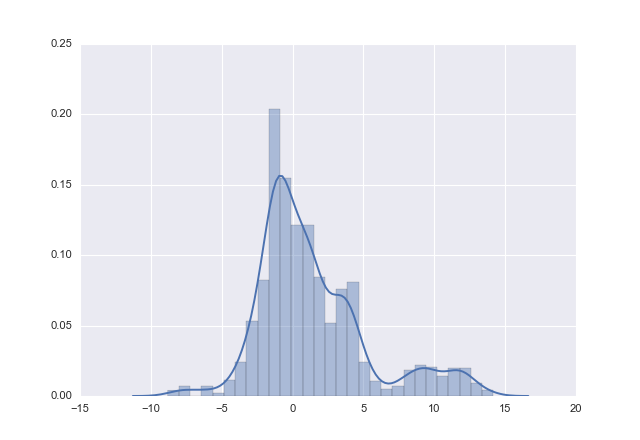

In [21]:
sns.distplot(np.log(scores[scores > 0]))

## Conclusion

We have imported the Agribalyse database. In the process of importing, we found and resolved several problems:

1. First, we had to fix the names and categories of biosphere flow names, to make them compatible with the names and categories used in ecoinvent version 3.
2. We linked inputs to activities in ecoinvent 3.2.
3. Next, we created a new database for the new biosphere flows that we couldn't match.
4. We added unlinked activities to our database.
5. We fixed allocated products with zero production values.

This was a bit of a pain, but this is the sad truth of LCA data compatibility - it currently isn't all that great.